in this file first we apply a sequentail model then we create a 
 fully_previous_layers_connected or fplc and compare their performance  

# sequentail model 

In [3]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import keras 
from keras import layers 
import h5py

In [4]:
train_set = h5py.File("datasets/train_signs.h5","r")
test_set = h5py.File("datasets/test_signs.h5","r")

In [6]:
x_train = np.array(train_set['train_set_x']).astype(np.float32)
x_test = np.array(test_set['test_set_x']).astype(np.float32)
y_test = np.array(test_set['test_set_y']).astype(np.float32)
y_train = np.array(train_set['train_set_y']).astype(np.float32)

In [38]:
del sequential_model

In [39]:
sequential_model = keras.Sequential([
    layers.Flatten(input_shape=[64,64,3]),
    layers.BatchNormalization(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    #layers.Dense(32,activation="relu"),
    #layers.Dense(16,activation="relu"),
    layers.Dense(6),
])

In [40]:
sequential_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 12288)             0         
                                                                 
 batch_normalization_6 (Bat  (None, 12288)             49152     
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 128)               1572992   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                      

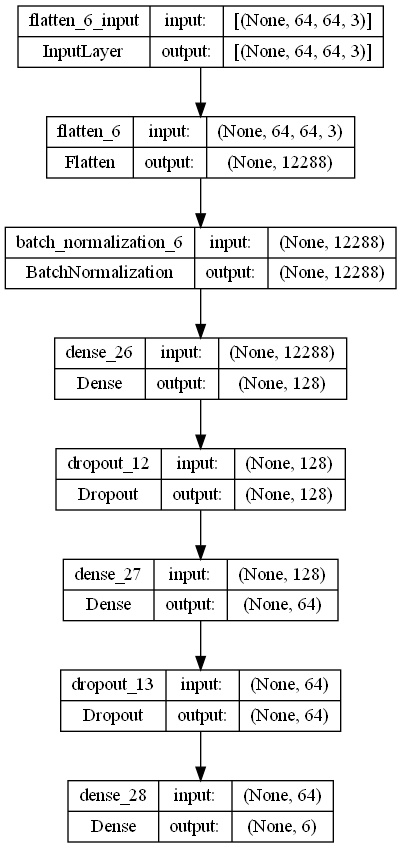

In [41]:
keras.utils.plot_model(sequential_model,show_shapes=True)

In [42]:
sequential_model.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [43]:
x_train.shape

(1080, 64, 64, 3)

In [71]:
history_1 = sequential_model.fit(x_train,y_train,epochs=100,batch_size=1080,validation_data=(x_test,y_test))

Epoch 1/100
1/1 [==============================] - 1s 717ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7842 - val_accuracy: 0.9083
Epoch 2/100
1/1 [==============================] - 0s 330ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.9000
Epoch 3/100
1/1 [==============================] - 0s 316ms/step - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.7629 - val_accuracy: 0.9000
Epoch 4/100
1/1 [==============================] - 0s 306ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.7387 - val_accuracy: 0.9000
Epoch 5/100
1/1 [==============================] - 0s 236ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7164 - val_accuracy: 0.9000
Epoch 6/100
1/1 [==============================] - 0s 248ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.6917 - val_accuracy: 0.9000
Epoch 7/100
1/1 [==============================] - 0s 234ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.6498 - val_accuracy: 0.9083
Epoch 8/100
1

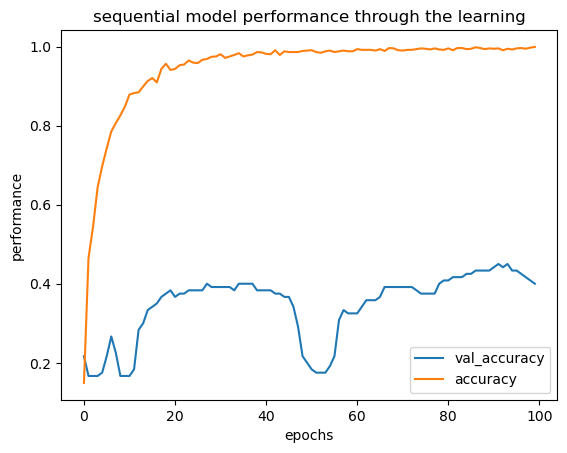

In [48]:
#plt.plot(history_1.history["loss"],label="loss")
#plt.plot(history_1.history["val_loss"],label="val_loss")
plt.plot(history_1.history["val_accuracy"],label="val_accuracy")
plt.plot(history_1.history["accuracy"],label="accuracy")
plt.title("sequential model performance through the learning")
plt.xlabel("epochs")
plt.ylabel("performance")
plt.legend()


# fully previous layers connected 

In [52]:
inputs = keras.Input(shape=[64,64,3])
layer1 = layers.Flatten()
layer2 = layers.BatchNormalization()
x = layer2(layer1(inputs))

In [53]:
layer3 = layers.Dense(128,activation="relu")
layer4 = layers.Dropout(0.2)
x1 = layer4(layer3(x))

In [55]:
layer5 = layers.Dense(64,activation="relu")
layer6 = layers.Dropout(0.2)
x2 = layer6(layer5(layers.concatenate([x,x1])))

In [56]:
layer7 = layers.Dense(6)
outputs = layer7(layers.concatenate([x,x1,x2]))

In [57]:
fplc = keras.Model(inputs,outputs,name="idea")

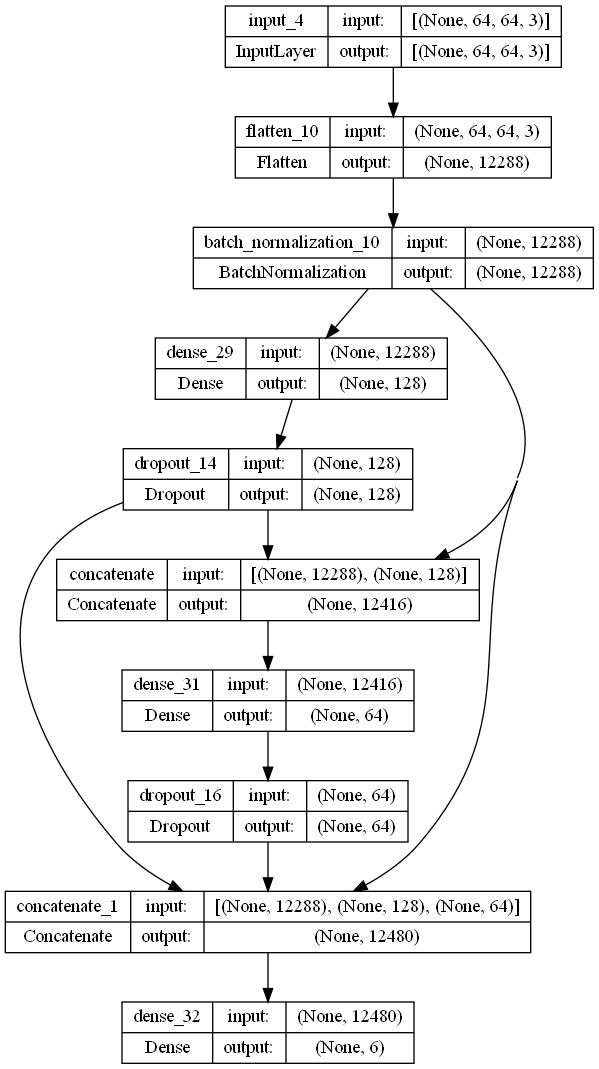

In [58]:
keras.utils.plot_model(fplc,show_shapes=True)

In [59]:
fplc.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [68]:
history_2 = fplc.fit(x_train,y_train,epochs=100,batch_size=1080,validation_data=(x_test,y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.7288e-04 - accuracy: 1.0000 - val_loss: 0.7878 - val_accuracy: 0.8667
Epoch 2/100
1/1 [==============================] - 1s 581ms/step - loss: 2.8554e-04 - accuracy: 1.0000 - val_loss: 0.7781 - val_accuracy: 0.8667
Epoch 3/100
1/1 [==============================] - 0s 492ms/step - loss: 2.8839e-04 - accuracy: 1.0000 - val_loss: 0.7686 - val_accuracy: 0.8667
Epoch 4/100
1/1 [==============================] - 0s 390ms/step - loss: 2.8515e-04 - accuracy: 1.0000 - val_loss: 0.7593 - val_accuracy: 0.8667
Epoch 5/100
1/1 [==============================] - 0s 374ms/step - loss: 2.8037e-04 - accuracy: 1.0000 - val_loss: 0.7503 - val_accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 395ms/step - loss: 2.8924e-04 - accuracy: 1.0000 - val_loss: 0.7412 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 386ms/step - loss: 3.2008e-04 - accuracy: 1.0000 - val_loss: 0.7318 - val_accur

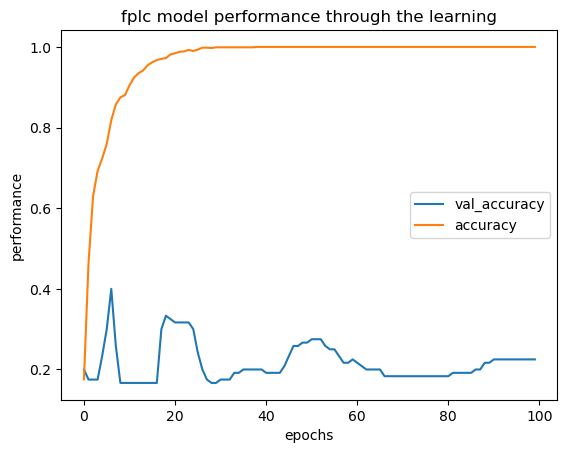

In [62]:
#plt.plot(history_2.history["loss"],label="loss")
#plt.plot(history_2.history["val_loss"],label="val_loss")
plt.plot(history_2.history["val_accuracy"],label="val_accuracy")
plt.plot(history_2.history["accuracy"],label="accuracy")
plt.title("fplc model performance through the learning")
plt.xlabel("epochs")
plt.ylabel("performance")
plt.legend()


# compare

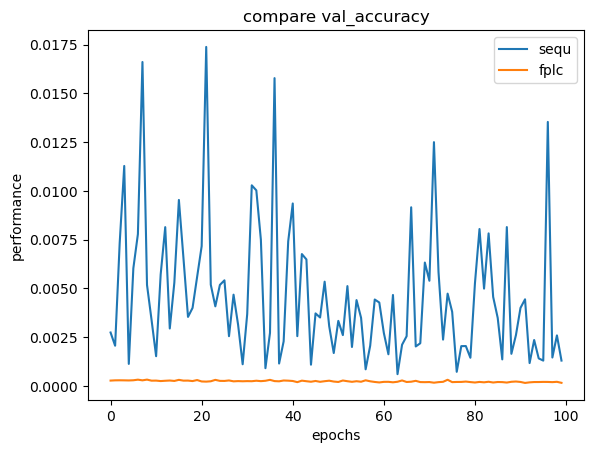

In [72]:
#plt.plot(history_2.history["loss"],label="loss")
#plt.plot(history_2.history["val_loss"],label="val_loss")
plt.plot(history_1.history["loss"],label="sequ")
plt.plot(history_2.history["loss"],label="fplc")
plt.title("compare val_accuracy")
plt.xlabel("epochs")
plt.ylabel("performance")
plt.legend()

result show that fplc has better and less oscillation on train set 
but sequential has better performance on test accuracy 
after 400 epochs

i should improve this testing in the future beacause this is my first try to follow one of my idea and absolotly this file isnt complete and 100 percent correct . but i will try to upgrade it after i upgrade my own wise about it 